<a href="https://colab.research.google.com/github/Aman-Singh-Akhand/QML-HEP-GSoC-2025/blob/main/Task_I_Quantum_Computing_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.1 MB/s eta 0:00:00


In [8]:
!pip install -U numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyquil 4.16.1 requires numpy<2.0,>=1.25, but you have numpy 2.2.4 which is incompatible.
pennylane 0.40.0 requires numpy<2.1, but you have numpy 2.2.4 which is incompatible.
cirq-core 1.4.1 requires numpy~=1.22, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.4 which is incompatible.


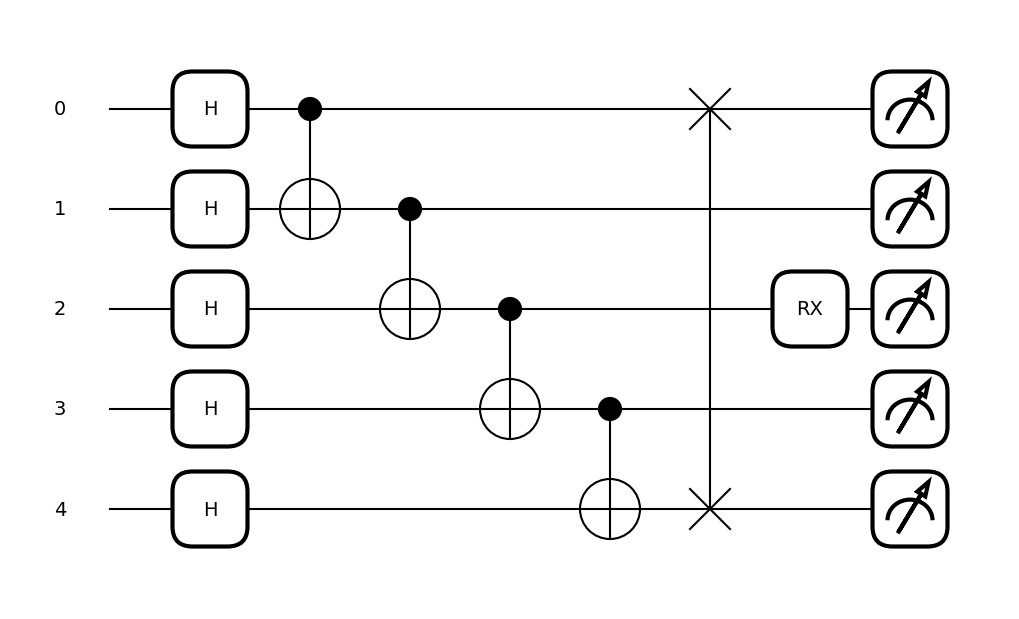

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

#5-qubit device
dev = qml.device('default.qubit', wires=5)

#The quantum function
@qml.qnode(dev)
def quantum_circuit():
    # Apply Hadamard to all qubits
    for i in range(5):
        qml.Hadamard(wires=i)

    # Apply CNOTs: (0,1), (1,2), (2,3), (3,4)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])

    # SWAP between qubit 0 and qubit 4
    qml.SWAP(wires=[0, 4])

    # Rotate X by pi/2 on qubit 2 (for example)
    qml.RX(np.pi / 2, wires=2)

    return qml.state()

quantum_circuit()

# Circuit Diagram
drawer = qml.draw_mpl(quantum_circuit)
drawer()
plt.show()

Probability of ancilla |0>: 0.7500, |1>: 0.2500


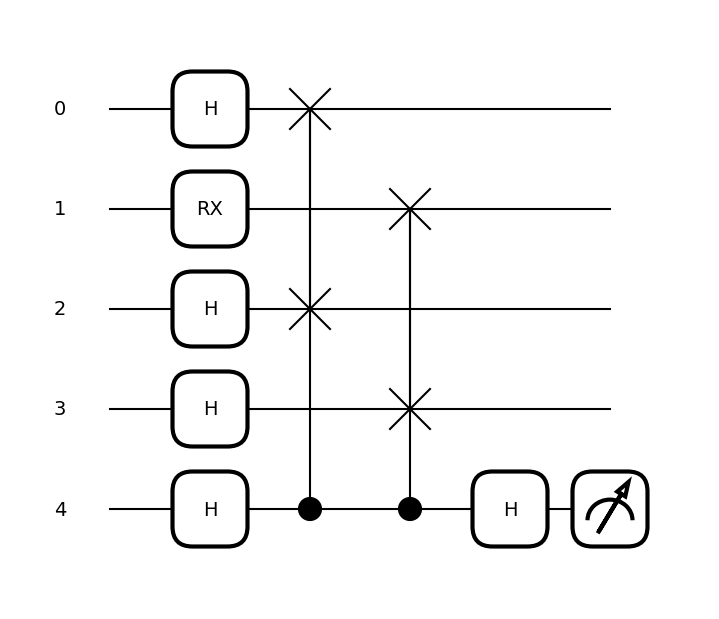

In [4]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# 5 qubits: 4 for data, 1 for ancilla (last one)
dev = qml.device('default.qubit', wires=5)

@qml.qnode(dev)
def swap_test_circuit():
    # H on qubit 0
    qml.Hadamard(wires=0)

    # RX(pi/3) on qubit 1
    qml.RX(np.pi / 3, wires=1)

    # H on qubits 2 and 3
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)

    # SWAP test using qubit 4 as ancilla
    qml.Hadamard(wires=4)

    # Controlled SWAP gates
    qml.ctrl(qml.SWAP, control=4)(wires=[0, 2])  # Compare q0 and q2
    qml.ctrl(qml.SWAP, control=4)(wires=[1, 3])  # Compare q1 and q3

    # Final H on ancilla
    qml.Hadamard(wires=4)

    # Measure ancilla (wire 4)
    return qml.probs(wires=4)


probs = swap_test_circuit()
print(f"Probability of ancilla |0>: {probs[0]:.4f}, |1>: {probs[1]:.4f}")

# Circuit Diagram
drawer = qml.draw_mpl(swap_test_circuit)
drawer()
plt.show()
